# scqubits example: the fluxonium qubit
J. Koch and P. Groszkowski

For further documentation of scqubits see https://scqubits.readthedocs.io/en/latest/.

---

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import scqubits as scq

# Fluxonium qubit

$H_\text{fl}=-4E_\text{C}\partial_\phi^2-E_\text{J}\cos(\phi-\varphi_\text{ext}) +\frac{1}{2}E_L\phi^2$

**Creation via GUI** (ipywidgets needs to be installed for this to work.)

In [2]:
fluxonium = scq.Fluxonium.create()

Output()

In [3]:
print(fluxonium)

Fluxonium-----------| [Fluxonium_1]
                    | EJ: 8.9
                    | EC: 2.5
                    | EL: 0.5
                    | flux: 0.0
                    | cutoff: 110
                    | truncated_dim: 10
                    |
                    | dim: 110



**Programmatic creation**

In [4]:
fluxonium2 = scq.Fluxonium(
    EJ=8.9,
    EC=2.5,
    EL=0.5,
    cutoff = 110,
    flux = 0.5
)

## Computing and visualizing spectra

In [5]:
fluxonium.eigenvals()

array([-2.7022458 ,  6.05619946,  6.27730681,  8.29978855, 14.23074422,
       16.86961382])

Spectral data:   0%|          | 0/151 [00:00<?, ?it/s]

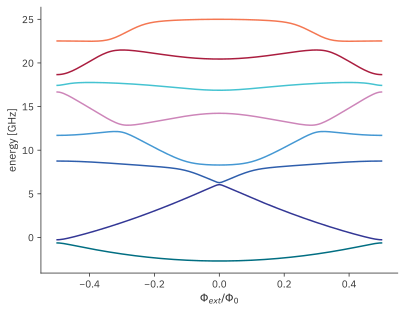

In [6]:
flux_list = np.linspace(-0.5, 0.5, 151)
fluxonium.plot_evals_vs_paramvals('flux', flux_list, evals_count=8);

In [7]:
fluxonium.cos_phi_operator()

array([[ 2.05740661e-01,  0.00000000e+00, -4.60050104e-01, ...,
         0.00000000e+00,  1.78616165e-61,  0.00000000e+00],
       [ 0.00000000e+00, -4.44868435e-01,  0.00000000e+00, ...,
        -6.10025949e-59,  0.00000000e+00,  1.86480751e-60],
       [-4.60050104e-01,  0.00000000e+00, -6.67742262e-02, ...,
         0.00000000e+00, -4.34635215e-58,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -6.10025949e-59,  0.00000000e+00, ...,
        -9.18367880e-02,  0.00000000e+00, -3.20968756e-02],
       [ 1.78616165e-61,  0.00000000e+00, -4.34635215e-58, ...,
         0.00000000e+00, -4.30134088e-02,  0.00000000e+00],
       [ 0.00000000e+00,  1.86480751e-60,  0.00000000e+00, ...,
        -3.20968756e-02,  0.00000000e+00, -1.10641059e-02]])

Spectral data:   0%|          | 0/151 [00:00<?, ?it/s]

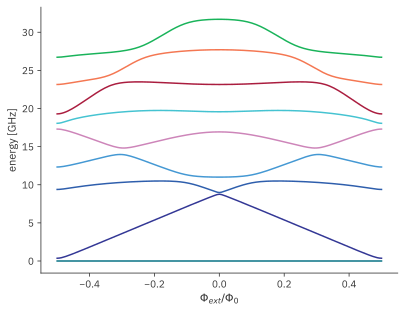

In [8]:
fluxonium.plot_evals_vs_paramvals('flux', flux_list, evals_count=9, subtract_ground=True);

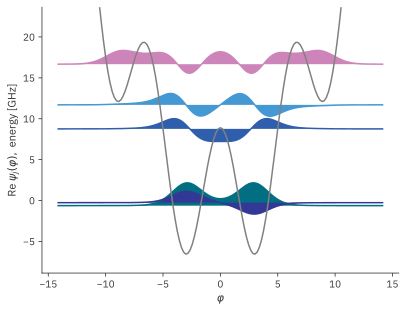

In [9]:
fluxonium.flux = 0.5
fluxonium.plot_wavefunction(esys=None, which=range(5), mode='real');

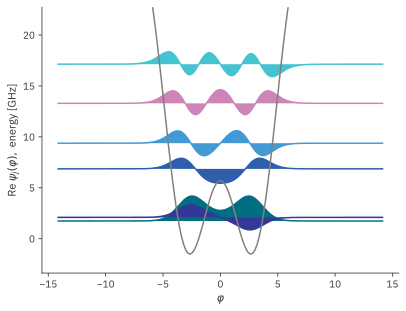

In [10]:
fluxonium = scq.Fluxonium(
    EJ=5.7,
    EC=1.2,
    EL=1.0,
    cutoff = 150,
    flux = 0.5
)
fig, axes=fluxonium.plot_wavefunction(esys=None, which=[0,1,2,3,4,5], mode='real');

## Matrix elements

In [11]:
phimat = fluxonium.matrixelement_table('phi_operator', evals_count=10)
print(phimat)

[[-1.72440044e-14 -2.42020774e+00  2.89829509e-15 -5.96669304e-01
   2.76267112e-16  1.26034410e-02  4.49445663e-16  1.05152531e-02
   4.77586162e-16 -2.08796925e-03]
 [-2.42020774e+00  1.46065071e-14  1.16100233e+00  1.78693882e-15
  -1.98939356e-01  4.55870836e-16  1.96392027e-02 -1.25856878e-15
  -1.88229452e-03 -1.37658567e-15]
 [ 2.89829509e-15  1.16100233e+00 -2.84267347e-15  2.02810531e+00
  -5.08998646e-16 -2.87499531e-01 -5.87097473e-16 -3.19256763e-02
  -1.90264149e-15  1.96457721e-04]
 [-5.96669304e-01  1.78693882e-15  2.02810531e+00 -9.97030183e-17
  -2.11221368e+00  7.28774090e-16 -1.78076985e-01  1.59718562e-15
  -4.52028150e-02  4.19320565e-15]
 [ 2.76267112e-16 -1.98939356e-01 -5.08998646e-16 -2.11221368e+00
   3.04761143e-16  2.41344721e+00  8.86763017e-16 -1.41490331e-01
   4.26173591e-16  5.74957935e-02]
 [ 1.26034410e-02  4.55870836e-16 -2.87499531e-01  7.28774090e-16
   2.41344721e+00 -4.00504442e-15  2.65902027e+00  1.09256448e-15
  -7.06894388e-02  6.22402443e-15

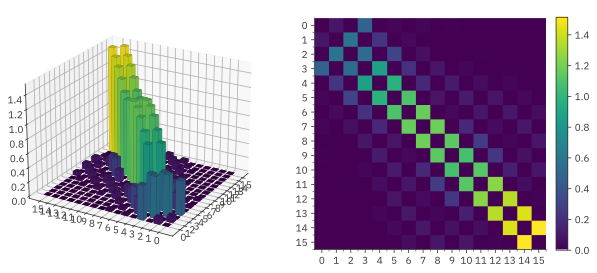

In [12]:
fluxonium.plot_matrixelements('n_operator', evals_count=16);

Spectral data:   0%|          | 0/151 [00:00<?, ?it/s]

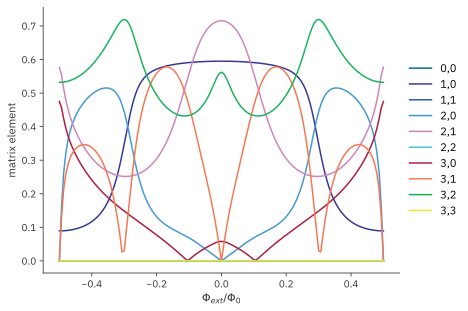

In [13]:
fluxonium.plot_matelem_vs_paramvals('n_operator', 'flux', flux_list, select_elems=4);